In [1]:
import torch

In [2]:
torch.cuda.is_available()#check the availablity of GPUs

True

## 1. Train the model.
Use _**train_diffusion.py**_ to train the model. We given an example training data in the path 'data/moad_data_train_pre100.lmdb' and a split file 'data/prompt_split_pre100.pt' to cut the data into training and validation set.

In [4]:
!python train_diffusion.py # Only 100 data are trained here for illustration.

[2023-11-26 09:16:38,235::train::INFO] Namespace(config='./configs/training.yml', device='cuda:0', logdir='./logs_diffusion', reschedule=False, tag='', train_report_iter=20)
[2023-11-26 09:16:38,235::train::INFO] {'data': {'name': 'pl', 'path': './', 'split': './prompt_split.pt', 'transform': {'ligand_atom_mode': 'add_aromatic', 'random_rot': False}}, 'model': {'model_mean_type': 'C0', 'beta_schedule': 'advance', 'beta_start': 1e-07, 'beta_end': 0.002, 'v_beta_schedule': 'cosine', 'v_beta_s': 0.01, 'num_diffusion_timesteps': 1000, 'loss_v_weight': 100.0, 'sample_time_method': 'symmetric', 'time_emb_dim': 6, 'time_emb_mode': 'sin', 'center_pos_mode': 'protein', 'time_dependent_loss': False, 'node_indicator': True, 'model_type': 'prompt', 'num_blocks': 1, 'num_layers': 6, 'hidden_dim': 128, 'n_heads': 16, 'edge_feat_dim': 4, 'num_r_gaussian': 15, 'knn': 32, 'num_node_types': 8, 'act_fn': 'mish', 'norm': True, 'cutoff_mode': 'knn', 'ew_net_type': 'global', 'num_x2h': 1, 'num_h2x': 1, 'r_m

## 2. Generate data for a given test_set.
Here we sample ligands in the test set. Processed test set are in the path 'data/test_data.pt'. we generat one ligand for each target. In 'sample.py' script, we can sample multiple targets at the same time. The batchsize is 10 and we sample ten different targets, generating one ligand for each target.

In [6]:
!python sample.py

sampling 0 batch and 0 repeat time
100%|#############################################| 1/1 [01:20<00:00, 80.55s/it]
[2023-11-26 09:22:48,851::evaluate::INFO] Sample done!
sampling 0 batch and 0 repeat time
100%|#############################################| 1/1 [01:19<00:00, 79.42s/it]
[2023-11-26 09:24:08,319::evaluate::INFO] Sample done!


## 3. Reconstruct molecules from generated data and detect the interactions from sampled poses.
we have finishing sampling the protein targets, the samples are saved in folder 'outputs_system' with name 'equa_last.pt', which saves the coordinates and atom types of ligand. Now we reconstruct the molecules from 'equa_last.pt' file and detect the interactions, the illustration results are saved in 'outputs_system/equa_aromatic.csv'

In [1]:
!python sample.py --evaluation True

Eval: 100%|███████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]
                                        protein_file  ... success_rate
0  test_set/PYRD_TRYCC_2_314_catalytic_0/3w83_B_r...  ...     1.000000
1       test_set/CHIB1_ASPFM_39_433_0/3chc_B_rec.pdb  ...     0.000000
2        test_set/IPMK_HUMAN_49_416_0/5w2g_A_rec.pdb  ...     0.500000
3        test_set/P2Y12_HUMAN_1_342_0/4pxz_A_rec.pdb  ...     0.090909
4        test_set/NOS3_HUMAN_65_480_0/4kcq_A_rec.pdb  ...     0.000000
5        test_set/NOS3_HUMAN_65_480_0/1rs9_A_rec.pdb  ...     0.500000
6        test_set/CCPR_YEAST_69_361_0/1a2g_A_rec.pdb  ...     0.000000
7         test_set/CDK6_HUMAN_1_312_0/2f2c_B_rec.pdb  ...     0.000000
8         test_set/CDK6_HUMAN_1_312_0/4aua_A_rec.pdb  ...     1.000000
9        test_set/CHOD_BREST_46_552_0/1coy_A_rec.pdb  ...     1.000000

[10 rows x 6 columns]
[2023-11-26 10:34:40,316::evaluate::INFO] ouput molecules file in 'outputs_system\eval_results' 


## 4. Draw a bar plot of interaction recovering accuracy
Here we provide the sampling results of InterDiff and other baseline methods. 

In [9]:
#import necessary packages
from scipy import stats
from statannotations.Annotator import Annotator
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_InterDiff vs. 6_InterDiff_noprompt: t-test independent samples, P_val:7.496e-28 t=1.152e+01
7_InterDiff vs. 7_InterDiff_noprompt: t-test independent samples, P_val:6.130e-78 t=2.053e+01
8_InterDiff vs. 8_InterDiff_noprompt: t-test independent samples, P_val:9.006e-76 t=2.070e+01
9_InterDiff vs. 9_InterDiff_noprompt: t-test independent samples, P_val:7.224e-36 t=1.390e+01
2_InterDiff vs. 2_InterDiff_noprompt: t-test independent samples, P_val:4.973e-120 t=2.402e+01
3_InterDiff vs. 3_InterDiff_noprompt: t-test independent samples, P_val:6.728e-75 t=1.900e+01
4_InterDiff vs. 4_InterDiff_noprompt: t-test independent samples, P_val:1.264e-131 t=2.544e+01
5_InterDiff vs. 5_InterDiff_noprompt: t-test independent samples, P_val:9.399e-55 t=1.631e+01
1_InterDiff vs. 1_InterDiff_noprompt: t-test independe

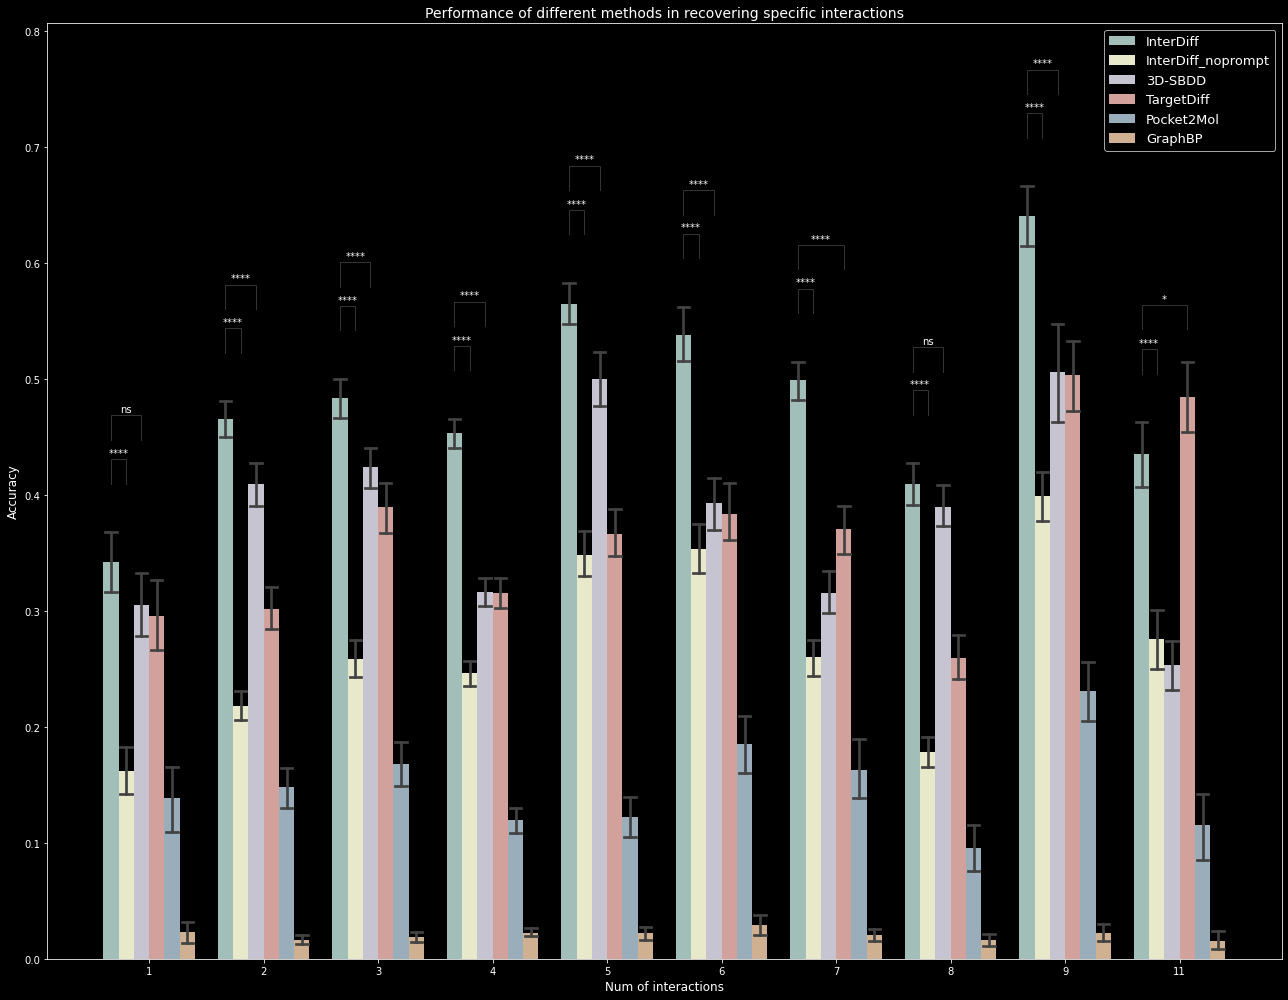

In [11]:
##inters success rate
all_files = [
    './inters/InterDiff_inters.csv','./inters/no_prompt.csv','./inters/pocket2mol_inters.csv',
    './inters/targetdiff_inters.csv','./inters/AR_inters.csv','./inters/GraphBP_inters.csv'
]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(figsize= (18, 14))
df_1 = pd.read_csv(all_files[0])
df_2 = pd.read_csv(all_files[1])
df_3 = pd.read_csv(all_files[2])
df_4 = pd.read_csv(all_files[3])
df_5 = pd.read_csv(all_files[4])
df_6 = pd.read_csv(all_files[5])

new_int = df_1['ori_inter'].values.tolist()
ge_int = df_1['generate_inter'].values.tolist()
df1 = [float(df_1['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df1_inter = [len(eval(df_1['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

new_int = df_2['ori_inter'].values.tolist()
ge_int = df_2['generate_inter'].values.tolist()
df2 = [float(df_2['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df2_inter = [len(eval(df_2['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

new_int = df_3['ori_inter'].values.tolist()
ge_int = df_3['generate_inter'].values.tolist()
df3 = [float(df_3['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df3_inter = [len(eval(df_3['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

new_int = df_4['ori_inter'].values.tolist()
ge_int = df_4['generate_inter'].values.tolist()
df4 = [float(df_4['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df4_inter = [len(eval(df_4['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

new_int = df_5['ori_inter'].values.tolist()
ge_int = df_5['generate_inter'].values.tolist()
df5 = [float(df_5['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df5_inter = [len(eval(df_5['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

new_int = df_6['ori_inter'].values.tolist()
ge_int = df_6['generate_inter'].values.tolist()
df6 = [float(df_6['success_rate'][idx]) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]
df6_inter = [len(eval(df_6['ori_inter'][idx])) for idx in range(len(new_int)) if eval(new_int[idx])!=[] and eval(ge_int[idx])!= ['fail']]

success = df1 + df2 + df5 + df4 + df3 + df6
p_values = []
for i in [1,2,3,4,5,6,7,8,9,11]:
    ss1 = np.array(df1)[np.argwhere(np.array(df1_inter)==i)]
    ss2 = np.array(df2)[np.argwhere(np.array(df2_inter)==i)]
    tstat, pval = stats.ttest_ind(a=ss1, b=ss2, alternative="two-sided")
    p_values.append(pval)
inters = df1_inter + df2_inter + df5_inter + df4_inter + df3_inter + df6_inter

mes = ['InterDiff'] * len(df1) + ['InterDiff_noprompt'] * len(df2) + ['3D-SBDD']*len(df5) + ['TargetDiff']*len(df4) + ['Pocket2Mol'] * len(df3) + ['GraphBP'] * len(df6)

sns.barplot(x=inters, y=success, hue=mes,capsize=.1,saturation=.4)
# tuples for statistical test
box_pairs = [((1,'InterDiff'),(1,'InterDiff_noprompt')),
            ((2,'InterDiff'),(2,'InterDiff_noprompt')),
            ((3,'InterDiff'),(3,'InterDiff_noprompt')),
            ((4,'InterDiff'),(4,'InterDiff_noprompt')),
            ((5,'InterDiff'),(5,'InterDiff_noprompt')),
            ((6,'InterDiff'),(6,'InterDiff_noprompt')),
            ((7,'InterDiff'),(7,'InterDiff_noprompt')),
            ((8,'InterDiff'),(8,'InterDiff_noprompt')),
            ((9,'InterDiff'),(9,'InterDiff_noprompt')),
            ((11,'InterDiff'),(11,'InterDiff_noprompt')),
            ((1,'InterDiff'),(1,'3D-SBDD')),
            ((2,'InterDiff'),(2,'3D-SBDD')),
            ((3,'InterDiff'),(3,'3D-SBDD')),
            ((4,'InterDiff'),(4,'3D-SBDD')),
            ((5,'InterDiff'),(5,'3D-SBDD')),
            ((6,'InterDiff'),(6,'3D-SBDD')),
            ((7,'InterDiff'),(7,'TargetDiff')),
            ((8,'InterDiff'),(8,'3D-SBDD')),
            ((9,'InterDiff'),(9,'3D-SBDD')),
            ((11,'InterDiff'),(11,'TargetDiff'))]

## perform annotation
annotator =  Annotator(ax,  x=inters,y=success,hue=mes,
                    pairs=box_pairs)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
ax.set_title('Performance of different methods in recovering specific interactions', fontsize=14)
ax.legend(loc='upper right',fontsize=13)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Num of interactions', fontsize=12)
plt.savefig('./accuracy.png')